# Showcase!

## Test data:
A sinusoid with a noise variance of $\beta = 0.3^2$.

$y = sin(2*\pi*x*f)$

$t = y + N(x|0,\beta)$

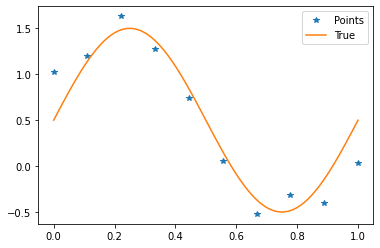

In [1]:
import Bayesian.BasisFunction.BF_fitting as BF
import matplotlib.pyplot as plt
import numpy as np

beta = 0.3**2
alpha = 11.1

N = 10
X = np.linspace(0,1,N).reshape(-1,1)
y = BF.g(X, noise_variance=(0))
t = BF.g(X, noise_variance=(beta))

X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_test = BF.g(X_test, noise_variance=(0))

plt.plot(X, t, '*', label='Points')
plt.plot(X_test, y_test, label='True')
plt.legend()
plt.show()

## Basis function curve fitting.
If something is known about the system basis functions can be used to fit a curve to the data points.
Using a polynomial we can see how the algorithm improves at predicting the system.

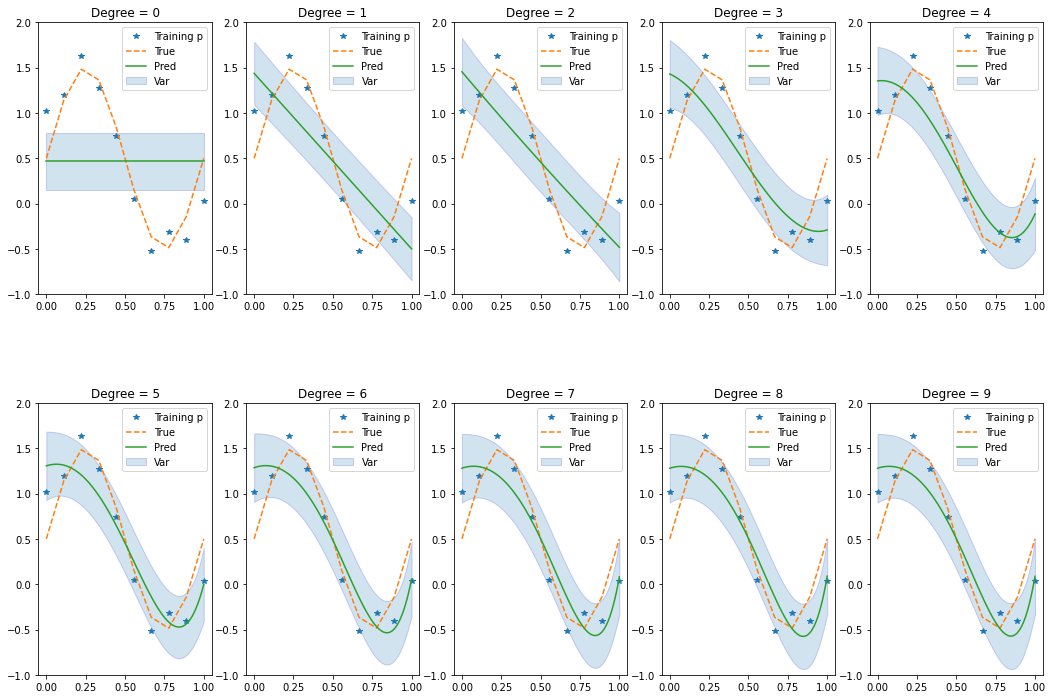

In [2]:
degree = 9
degrees = range(degree + 1)

phi = BF.expand(X, bf=BF.polynomial_basis_function, bf_args=degrees[1:])
phi_test = BF.expand(X_test, bf=BF.polynomial_basis_function, bf_args=degrees[1:])

plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)

for d in degrees:
    up = d + 1
    m_N, S_N = BF.posterior(phi[:,:up], t, 1/alpha, 1/beta)
    y_pred, y_var = BF.posterior_predictive(phi_test[:,:up], m_N, S_N, 1/beta)

    plt.subplot(2, 5, up)
    plt.plot(X, t, '*')
    plt.plot(X, y, linestyle='dashed')
    plt.plot(X_test, y_pred, label=None)
    plt.fill_between(X_test[:,0], y_pred[:,0]-np.sqrt(y_var), y_pred[:,0]+np.sqrt(y_var), alpha=0.2, edgecolor='#1B2ACC')
    plt.legend(['Training p', 'True', 'Pred', 'Var'])
    plt.title(f'Degree = {d}')
    plt.ylim(-1.0, 2.0)



## Gaussian processes

c:\Users\rytte\OneDrive\Dokument\GitHub\Algorithms\utils\plot_helper.py:78: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


[]

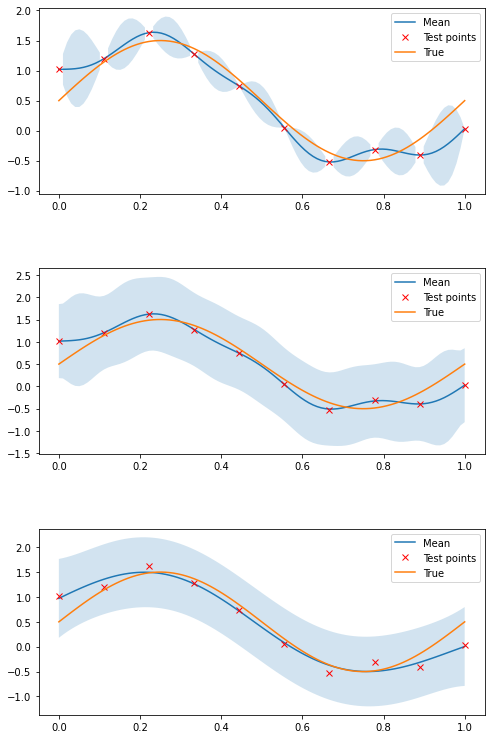

In [3]:
import Bayesian.GaussianProcesses.GP as GP
from utils.plot_helper import plot_gp

def noise(size, variance):
        return np.random.normal(scale=np.sqrt(variance), size=size)

gp = GP.GP(5, 0.13)

mean, sigma = gp.posterior(X, t, X_test, 0)

mean2, sigma2 = gp.posterior(X, t, X_test, beta)

gp = GP.GP(3, 0.35)

mean3, sigma3 = gp.posterior(X, t, X_test, beta)

plt.figure(figsize=(8, 13))
plt.subplots_adjust(hspace=0.4)

plt.subplot(3,1,1)
plot_gp(mean, sigma, X_test, X_train=X, Y_train=t)
plt.plot(X_test, y_test, label='True')
plt.legend()
plt.plot()

plt.subplot(3,1,2)

plot_gp(mean2, sigma2, X_test, X_train=X, Y_train=t)
plt.plot(X_test, y_test, label='True')
plt.legend()
plt.plot()

plt.subplot(3,1,3)

plot_gp(mean3, sigma3, X_test, X_train=X, Y_train=t)
plt.plot(X_test, y_test, label='True')
plt.legend()
plt.plot()

(20000, 1)


[]

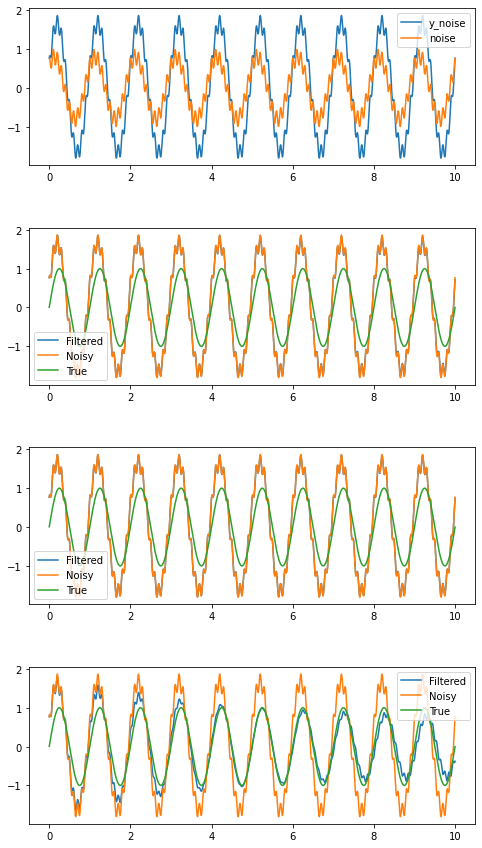

In [4]:
import AdaptiveFilters.AF as filters

N = 20000
x = np.linspace(0,10,N).reshape(-1,1)
noise = np.sin(2*np.pi*x+ np.pi/4)*0.8 + np.sin(10*2*np.pi*x+ np.pi/2)*0.2
y = np.sin(2*np.pi*x)
y_noisy = y + noise

p = 2
print(np.shape(noise))
out = filters.LMS(noise, y_noisy, p, 0.2e-05)

out2 = filters.LMS(noise, y_noisy, p, 0.1e-05)

out3 = filters.RLS(noise, y_noisy, p, 0.9999, 0.0001)

plt.figure(figsize=(8, 15))
plt.subplots_adjust(hspace=0.4)

plt.subplot(4,1,1)
plt.plot(x,y_noisy,x,noise)
plt.legend(['y_noise', 'noise'])

plt.subplot(4,1,2)
plt.plot(x[p:],out, x[p:],y_noisy[p:], x[p:],y[p:])
plt.legend(['Filtered', 'Noisy', 'True'])
plt.plot()

plt.subplot(4,1,3)
plt.plot(x[p:],out2, x[p:],y_noisy[p:], x[p:],y[p:])
plt.legend(['Filtered', 'Noisy', 'True'])
plt.plot()

plt.subplot(4,1,4)
plt.plot(x[p:],out3, x[p:],y_noisy[p:], x[p:],y[p:])
plt.legend(['Filtered', 'Noisy', 'True'])
plt.plot()


In [9]:
import wave
import struct

def everyOther (v, offset=0):
    return [v[i] for i in range(offset, len(v), 2)]

def wavLoad (fname):
    wav = wave.open(fname, "rb")
    (nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
    frames = wav.readframes(nframes*nchannels)
    out = struct.unpack_from("%dh" % nframes*nchannels, frames)
    #out = frames

    if nchannels == 2:
        left = np.array(list (everyOther(out, 0)))
        right = np.array(list (everyOther(out,1)))
    else:
        left = np.array(out)
        right = left
    return left, right

l1, r1 = wavLoad("./AdaptiveFilters/audio/v_g.wav")
l2, r2 = wavLoad("./AdaptiveFilters/audio/g.wav")

p = 20

l1 = l1 - np.mean(l1)
l2 = l2 - np.mean(l2)

l1 = l1[0:44100*1,np.newaxis]/np.max(l1)
l2 = l2[0:44100*1,np.newaxis]/np.max(l2)
fl = filters.LMS(l2, l1, p, 0.9e-05)
fl = fl[:, np.newaxis]
print(np.shape(fl))


(44080, 1)


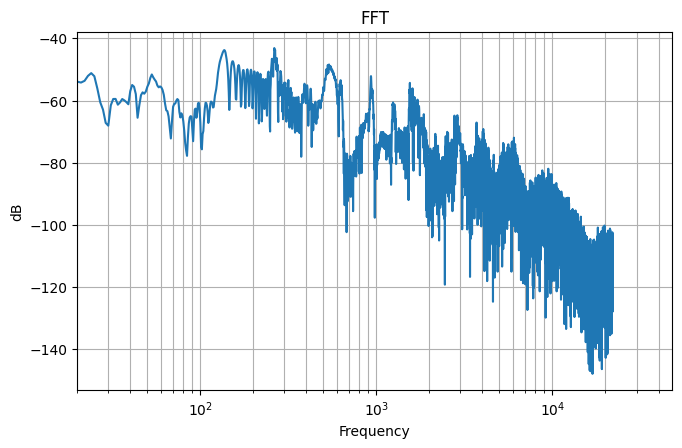

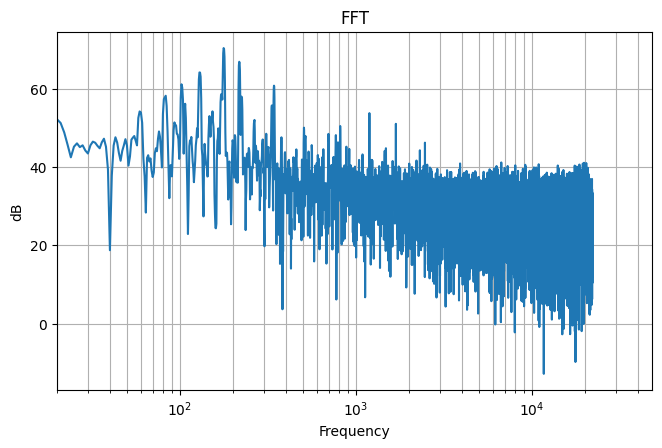

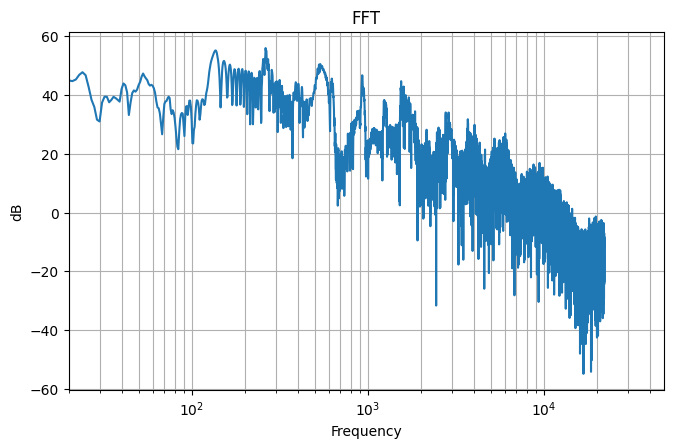

In [11]:
from utils.plot_helper import makeFFT

l2 = l2[0:16*44100*1]
l2 = np.int16(l2/np.max(np.abs(l2))*32767)
fl = np.int16(fl/np.max(np.abs(fl))*32767)

t = np.linspace(0,1,44100*1)
t = t[:,np.newaxis]
xf1, a1, b1, s = makeFFT(t,l1)
xf2, a2, b2, s = makeFFT(t,l2)
xf3, a3, b3, s = makeFFT(t[0:len(fl)],fl[0:len(fl)])

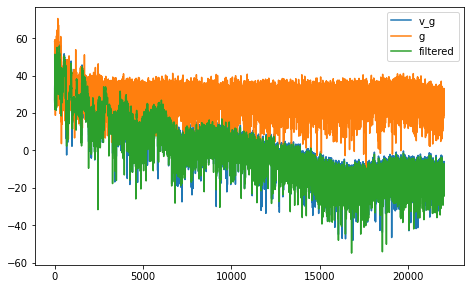

In [12]:
plt.plot(xf1, b1+100, xf2, b2, xf3, b3)
plt.legend(['v_g', 'g', 'filtered'])

In [29]:
from scipy.io.wavfile import write

write('test.wav', 44100, fl)
write('origi.wav', 44100, l2)